# Cleaning and describing a dataset

# Contents
1. Introduction
2. Cleaning and preparing data
3. Data description
4. Conclution

# 1. Introduction

That is the pet-project for cleaning and describing data with the help of the pandas python library. All illustrations in this project were made with the help of the matplotlib python library.<br> Data sample was got on kaggle.com: https://www.kaggle.com/datasets/teamincribo/financial-transactions.<br><br>
The data sample is an excel file with the list of fictional financial transactions.<br> Let's see first the head of the file (first 5 rows).

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#read file
df=pd.read_csv('combined_fictional_financial_transactions.csv')
df.head()

,Transaction ID,Date,Currency,Sender,Receiver,Amount,Fee,Type
0,TX001,2023-05-01,Auric,John Goldsmith,Sarah Gilded,100 Auric,2 Auric,Purchase
1,TX002,2023-05-02,Electra,Olivia Current,Ethan Charge,500 Electra,10 Electra,Transfer
2,TX003,2023-05-03,Zentia,Ava Zenith,Leo Zenith,200 Zentia,5 Zentia,Payment
3,TX004,2023-05-05,Lumina,Luna Radiance,Sol Bright,50 Lumina,1 Lumina,Purchase
4,TX005,2023-05-06,Auric,Michael Goldsmith,Emma Gilded,75 Auric,2 Auric,Transfer


# 2. Cleaning and preparing data

Before any operations with the data, let's see information about the file.

In [2]:
#information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  1110 non-null   object
 1   Date            1110 non-null   object
 2   Currency        1110 non-null   object
 3   Sender          1110 non-null   object
 4   Receiver        1110 non-null   object
 5   Amount          1110 non-null   object
 6   Fee             1110 non-null   object
 7   Type            1110 non-null   object
dtypes: object(8)
memory usage: 69.5+ KB


As you can see, we have 1100 rows and 8 columns.<br> Also, we can mention in the head of the file above, that the currency of <b>Amount</b> and <b>Fee</b> columns are the same as in <b>Currency</b> column.<br>
So let's check, do we have the same trend in the entire file?

In [3]:
#extractin currency of Amount and Fee coulumn and compare to Currency column
df['Amount Currency']=df['Amount'].str.extract('([A-z]+)')
df['Fee Currency']=df['Fee'].str.extract('([A-z]+)')
df['Checker']=((df['Currency']==df['Amount Currency']) & (df['Currency']==df['Fee Currency']))
print('The number of rows where Amount and Fee columns have the same currency as Currency column is: ',df['Checker'].count(),'. That is the entire file.')
df=pd.read_csv('combined_fictional_financial_transactions.csv')


The number of rows where Amount and Fee columns have the same currency as Currency column is:  1110 . That is the entire file.


Since we have the same currency, let's remove it from <b>Amount</b> and <b>Fee</b> columns.

In [4]:
df['Amount']=df['Amount'].str.extract('(\d+)')
df['Fee']=df['Fee'].str.extract('(\d+)')
df.head()

,Transaction ID,Date,Currency,Sender,Receiver,Amount,Fee,Type
0,TX001,2023-05-01,Auric,John Goldsmith,Sarah Gilded,100,2,Purchase
1,TX002,2023-05-02,Electra,Olivia Current,Ethan Charge,500,10,Transfer
2,TX003,2023-05-03,Zentia,Ava Zenith,Leo Zenith,200,5,Payment
3,TX004,2023-05-05,Lumina,Luna Radiance,Sol Bright,50,1,Purchase
4,TX005,2023-05-06,Auric,Michael Goldsmith,Emma Gilded,75,2,Transfer


We also do not need <b>Transaction ID</b>, since it is only TX and transaction number. Let's remove it either.

In [5]:
df.drop('Transaction ID',axis='columns', inplace=True)
df.head()

,Date,Currency,Sender,Receiver,Amount,Fee,Type
0,2023-05-01,Auric,John Goldsmith,Sarah Gilded,100,2,Purchase
1,2023-05-02,Electra,Olivia Current,Ethan Charge,500,10,Transfer
2,2023-05-03,Zentia,Ava Zenith,Leo Zenith,200,5,Payment
3,2023-05-05,Lumina,Luna Radiance,Sol Bright,50,1,Purchase
4,2023-05-06,Auric,Michael Goldsmith,Emma Gilded,75,2,Transfer


The next step will be converting certain columns in the necessary data type. As we can mention from the information above, each column now has an object data type.<br>
Let's convert <b>Date</b> column to datetime type, <b>Amount</b> and <b>Fee</b> columns to integer type.

In [6]:

df['Amount'] = df['Amount'].astype(int)
df['Fee'] = df['Fee'].astype(int)
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1110 non-null   datetime64[ns]
 1   Currency  1110 non-null   object        
 2   Sender    1110 non-null   object        
 3   Receiver  1110 non-null   object        
 4   Amount    1110 non-null   int32         
 5   Fee       1110 non-null   int32         
 6   Type      1110 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 52.2+ KB


Now we have the right data type. The last step before the desciption part will be rearranging columns.<br>
Also, let's sort the table by <b>Date</b> ascending and by <b>Amount</b> descending.

In [7]:
cols = df.columns.values.tolist()
df = df[cols[0:1] + cols[2:6]+[cols[1]]+[cols[6]]]
df.sort_values(['Date','Amount'],ascending=[1,0])

,Date,Sender,Receiver,Amount,Fee,Currency,Type
699,2023-01-01,Cameron Hunter,Kevin Ross,766,12,Lumina,Purchase
39,2023-01-01,Robert Oliver,Cynthia Shea,662,41,Electra,Purchase
1109,2023-01-01,Scott Smith,Michael Stanton,271,16,Lumina,Purchase
622,2023-01-02,Eric Munoz,Natasha Wilson,938,27,Zentia,Payment
1021,2023-01-02,Derek Larsen,Matthew Vargas,644,2,Auric,Purchase
...,...,...,...,...,...,...,...
1012,2023-08-27,Julian Clarke,Elizabeth Tran,599,35,Zentia,Purchase
918,2023-08-27,James Brown,John Rodriguez,280,16,Zentia,Transfer
84,2023-08-27,Leslie Wilson,Kelly Vargas,172,37,Lumina,Purchase
391,2023-08-27,Randy Nelson,Mitchell Bishop,121,48,Lumina,Payment


After that section, we have cleaned, sorted data.<br>Each column has the appropriate data type and we can move to the next section, in which we will describe what we see.

# 3. Describing data

## 3.1 Basic statistics<br>
In this part, I would like to give you basic information about the transactions we have.<br>
Let's start with the average number of transactions per day. As we can see above, there is a time interval from 2023-01-01 to 2023-08-27. It is about 8 months.

In [8]:
Group_by_date=df.groupby('Date',as_index=False).count()
average=Group_by_date['Sender'].sum()/Group_by_date['Sender'].count()
print('The average number of transactions per day is: ', round(average,2),'tran/day')

The average number of transactions per day is:  4.66 tran/day


We can see that not all the currencies are the same.<br> Let's count how many different currencies are in this file.

In [9]:
#Number of different currencies
print('We have: ',len(df['Currency'].unique()),' different currencies. They are: ',df['Currency'].unique())

We have:  4  different currencies. They are:  ['Auric' 'Electra' 'Zentia' 'Lumina']


There are 3 types of transfers.

In [10]:
print('They are: ',df['Type'].unique())

They are:  ['Purchase' 'Transfer' 'Payment']


##### Mean amount of transaction

Text(0, 0.5, 'Mean of transactions')

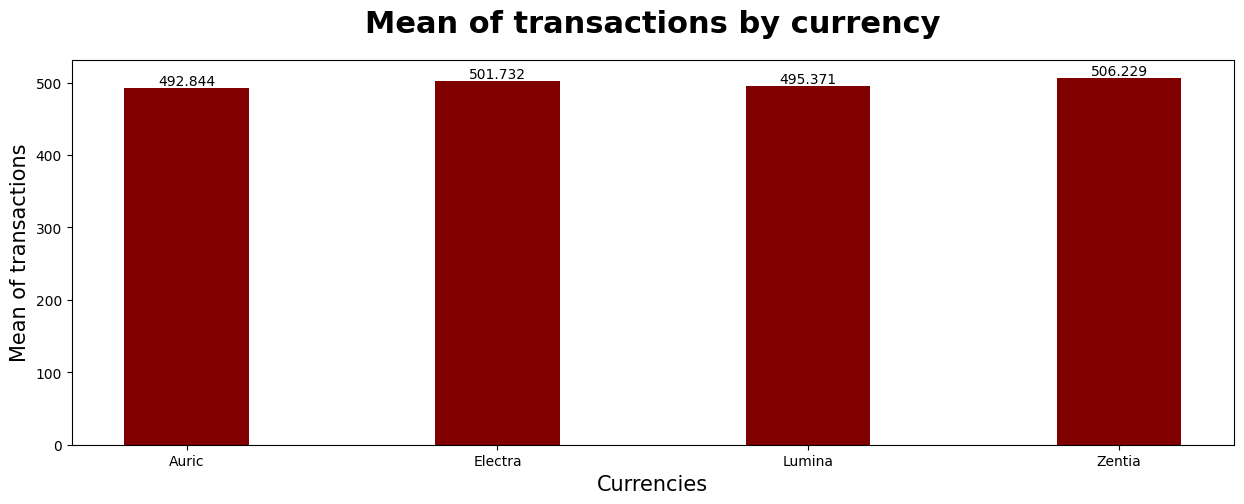

In [ ]:
Group_of_currencies=df.drop(['Date', 'Sender', 'Receiver','Type'],axis=1)
Group_of_currencies=Group_of_currencies.groupby('Currency',as_index=False).mean()
# creating the dataset

currencies = Group_of_currencies['Currency'].values.tolist()
values = Group_of_currencies['Amount'].values.tolist()
colors = ['maroon', 'maroon', 'maroon', 'maroon']# for color bars

# creating the bar plot
plt.figure(figsize=(15, 5))
plt.title('Mean of transactions by currency',fontsize=22,weight='bold',y=1.05)
bar = plt.bar(currencies, values, color =colors,width = 0.4)
plt.bar_label(bar)
plt.xlabel('Currencies',fontsize=15)
plt.ylabel('Mean of transactions',fontsize=15)

##### Information about Senders and Receivers:

In [ ]:
print('In this table we have:',len(pd.unique(df['Sender'])), ' distinct Senders and: ',len(pd.unique(df['Receiver'])),' distinct Receivers.')

In this table we have: 1103  distinct Senders and:  1099  distinct Receivers.


In [ ]:
list1=df['Receiver'].values.tolist()
list2=df['Sender'].values.tolist()
res=[]
for i in range(len(list1)):
    if list1[i] in list2:
        res.append(list1[i])
print('Interesting that there are only ',len(res),' persons from the Senders column, who are also in the Receivers column. So they are not only sending, but also receiving money.')

Interesting that there are only  18  persons from the Senders column are also in the Receivers column. So they are not only sending, but also receiving money.


## 3.1  Detailed consideration<br>
In this part I want to draw your attention to the values of the Amount and Fee column. So we will dive deeper into numbers.<br>
First of all, we will group our transactions by currency, count them and sum them up.

In [ ]:
Group_of_currencies=df.groupby('Currency',as_index=False).count()
Group_of_currencies['Count of transactions']=Group_of_currencies['Date']
Group_of_currencies['Sum of transactions']=df[['Currency','Amount']].groupby('Currency',as_index=False).sum()['Amount']
Group_of_currencies['Sum of fees']=df[['Currency','Fee']].groupby('Currency',as_index=False).sum()['Fee']
Group_of_currencies[['Currency','Count of transactions','Sum of transactions','Sum of fees']]

,Currency,Count of transactions,Sum of transactions,Sum of fees
0,Auric,263,129618,6262
1,Electra,269,134966,7150
2,Lumina,307,152079,6975
3,Zentia,271,137188,6819


Let's create a bar chart from this values

C:\Users\dimpi\AppData\Local\Temp\ipykernel_20428\1995495714.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)  # row 1, column 3, count 1


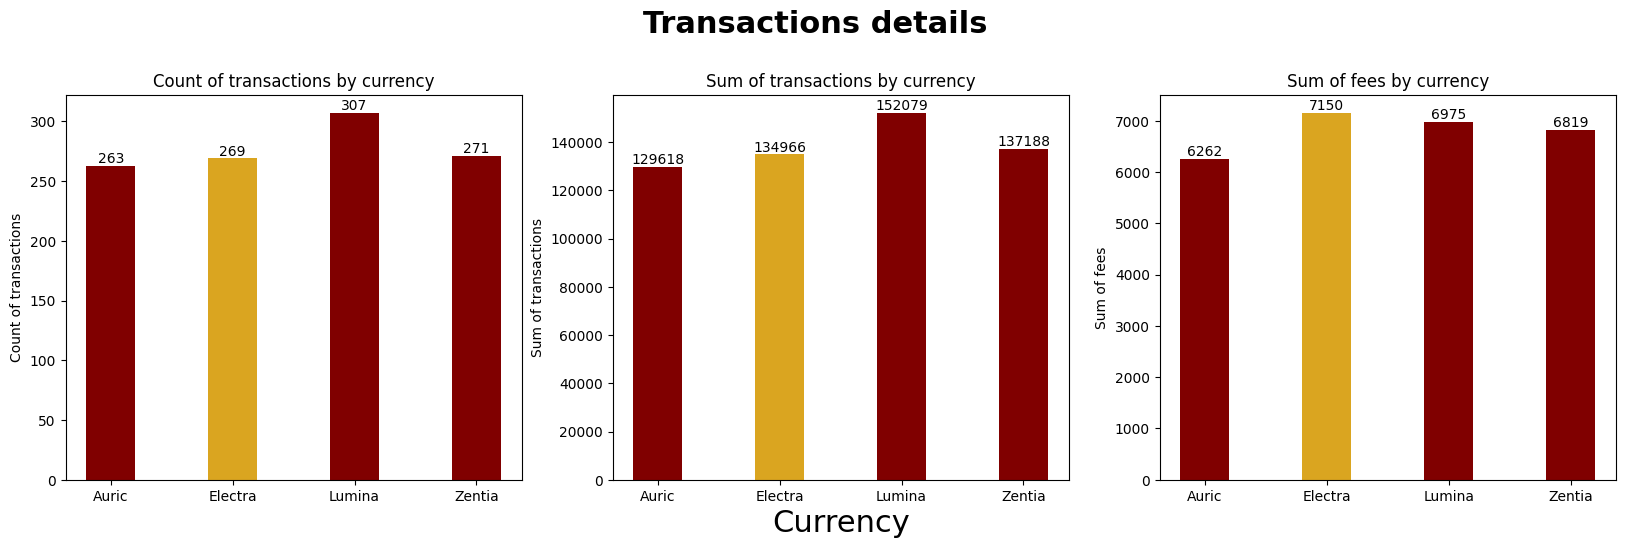

In [ ]:
# creating the dataset
currencies = Group_of_currencies['Currency'].values.tolist()
values = Group_of_currencies['Count of transactions'].values.tolist()
colors = ['maroon', 'goldenrod', 'maroon', 'maroon']# for color bars

# creating the bar plot
plt.subplots(figsize=(20, 5))
plt.suptitle('Transactions details',fontsize=22,weight='bold',y=1.05)
# using subplot function and creating plot one
plt.subplot(1, 3, 1)  # row 1, column 3, count 1
bar = plt.bar(currencies, values, color =colors,width = 0.4)
plt.bar_label(bar)
plt.title('Count of transactions by currency')
plt.ylabel('Count of transactions')
 
# using subplot function and creating plot two
# row 1, column 3, count 2
plt.subplot(1, 3, 2)
currencies = Group_of_currencies['Currency'].values.tolist()
values = Group_of_currencies['Sum of transactions'].values.tolist()
bar = plt.bar(currencies, values, color =colors,
        width = 0.4)
plt.bar_label(bar)
plt.title('Sum of transactions by currency')
plt.xlabel('Currency',fontsize=22)
plt.ylabel('Sum of transactions')

# using subplot function and creating plot three
# row 1, column 3, count 3
plt.subplot(1, 3, 3)
currencies = Group_of_currencies['Currency'].values.tolist()
values = Group_of_currencies['Sum of fees'].values.tolist()
bar = plt.bar(currencies, values, color =colors,width = 0.4)
plt.bar_label(bar)
plt.title('Sum of fees by currency')
plt.ylabel('Sum of fees')
 

# show plot
plt.show()

As we can see on charts above, that everything is normal besides <b>Electra</b> currency(yellow bar). <b>Electra</b> currency in this situation is eyecatching because we got more fees to compare with <b>Lumina</b>, despite the fact that we had fewer operations and less Sum of transactions.<br>
<b>Electra</b> currency is in the second place by count of transactions and sum of transactions, but in the first place by the sum of fees(income of our bank or other organization).

The main question now is why we are getting more fees from <b>Electra</b>? <br><br>
The answer is that we are charging more in transactions of <b>Electra</b> than any other currency.

C:\Users\dimpi\AppData\Local\Temp\ipykernel_20428\1678408110.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)  # row 1, column 3, count 1


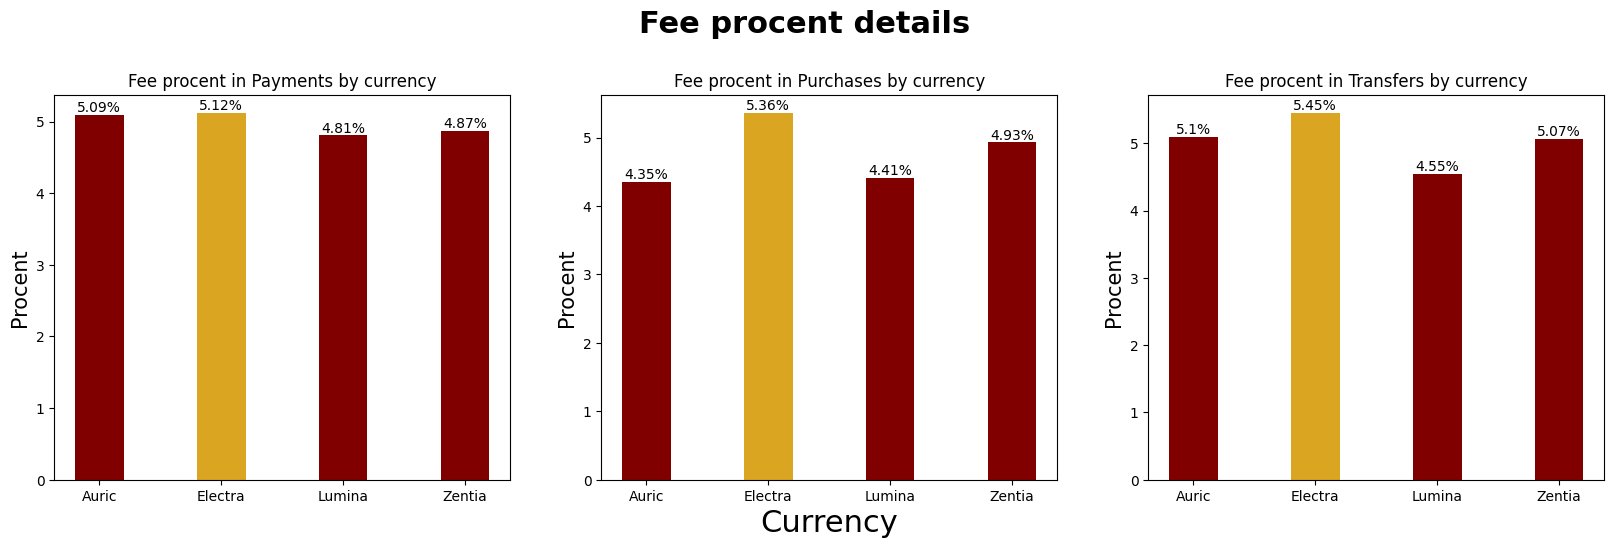

In [67]:
#drop unnecessary columns
drop_unnes_col=df.drop(['Date', 'Sender', 'Receiver'],axis=1)
drop_unnes_col=drop_unnes_col.groupby(by=['Type', 'Currency'],as_index=False).sum()
drop_unnes_col['Fee procent']=round(drop_unnes_col['Fee']*100/drop_unnes_col['Amount'],2)

# creating the dataset
currencies = drop_unnes_col[drop_unnes_col['Type']=='Payment']['Currency'].values.tolist()
values = drop_unnes_col[drop_unnes_col['Type']=='Payment']['Fee procent'].values.tolist()
colors = ['maroon', 'goldenrod', 'maroon', 'maroon']# for color bars

# creating the bar plot
plt.subplots(figsize=(20, 5))
plt.suptitle('Fee procent details',fontsize=22,weight='bold',y=1.05)
# using subplot function and creating plot one
plt.subplot(1, 3, 1)  # row 1, column 3, count 1
bar = plt.bar(currencies, values, color =colors,width = 0.4)
plt.bar_label(bar,labels=[str(value)+'%' for value in values])
plt.title('Fee procent in Payments by currency')
plt.ylabel('Procent',fontsize=15)
 
# using subplot function and creating plot two
# row 1, column 3, count 2
plt.subplot(1, 3, 2)
currencies = drop_unnes_col[drop_unnes_col['Type']=='Purchase']['Currency'].values.tolist()
values = drop_unnes_col[drop_unnes_col['Type']=='Purchase']['Fee procent'].values.tolist()
bar = plt.bar(currencies, values, color =colors,
        width = 0.4)
plt.bar_label(bar,labels=[str(value)+'%' for value in values])
plt.title('Fee procent in Purchases by currency')
plt.xlabel('Currency',fontsize=22)
plt.ylabel('Procent',fontsize=15)

# using subplot function and creating plot three
# row 1, column 3, count 3
plt.subplot(1, 3, 3)
currencies = drop_unnes_col[drop_unnes_col['Type']=='Transfer']['Currency'].values.tolist()
values = drop_unnes_col[drop_unnes_col['Type']=='Transfer']['Fee procent'].values.tolist()
bar = plt.bar(currencies, values, color =colors,width = 0.4)
plt.bar_label(bar,labels=[str(value)+'%' for value in values])
plt.title('Fee procent in Transfers by currency')
plt.ylabel('Procent',fontsize=15)
 

# show plot
plt.show()

As the chart is illustrated, even the lowest fee of <b>Electra</b> 5.12% is bigger than the highest fee of any currency else. <br><br>That is the key of <b>Electra</b> to the leadership. 

# 4. Conclusion
In this project we cleaned and described the input excel table. Now we can build our own vision of the situation with the financial operations in this data sample.<br>
We have also found the leaders in our currencies by all general options.<br> I hope my work made a good impression on you. <br>Thank you for reading.